**<font size=5>集成学习与随机森林</font>**

假设您向成千上万的随机人提出了一个复杂的问题，然后汇总他们的答案。在许多情况下，您会发现此汇总答案比专家答案更好。同样，如果将一组预测变量（例如分类器或回归变量）的预测汇总在一起，则通常会得到比使用最佳单个预测变量更好的预测。一组预测变量称为集合。因此，该技术称为“集成学习”，而“集成学习”算法称为“集成方法”。

作为Ensemble方法的示例，您可以训练一组决策树分类器，每个分类器在训练集的不同随机子集上。要进行预测，您需要获得所有单个树的预测，然后预测得票最多的类别作为最终的预测结果。这样的决策树集合称为随机森林，尽管它很简单，但是它是当今可用的最强大的机器学习算法之一。

一旦您已经建立了一些好的预测变量，您通常会在项目结束时经常使用Ensemble方法，以将它们组合成一个更好的预测变量。实际上，机器学习竞赛中的获奖解决方案通常涉及几种Ensemble方法（最著名的是Netflix奖竞赛）。

在本章中，我们将讨论最流行的Ensemble方法，包括bagging，stacking和boosting等。 我们还将探索随机森林。

**<font size=5>一、集成学习</font>**

**<font size=4>Voting Classifiers投票分类器</font>**

假设您已经训练了几个分类器，每个分类器都能达到约80％的准确性。 您可能具有Logistic回归分类器，SVM分类器，随机森林分类器，K最近邻分类器，也许还有更多其他分类器。
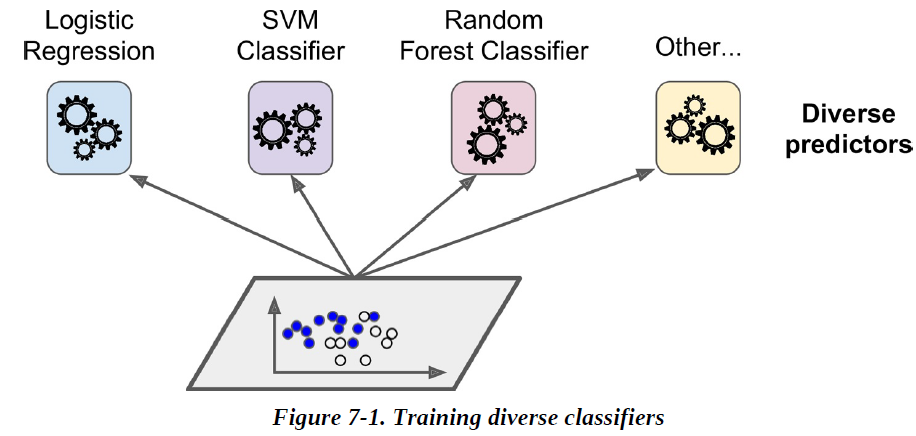

创建更好的分类器的一种非常简单的方法是汇总每个分类器的预测，并将获得最高票数的类别作为最终预测类别。该多数投票分类器称为“硬投票”分类器。

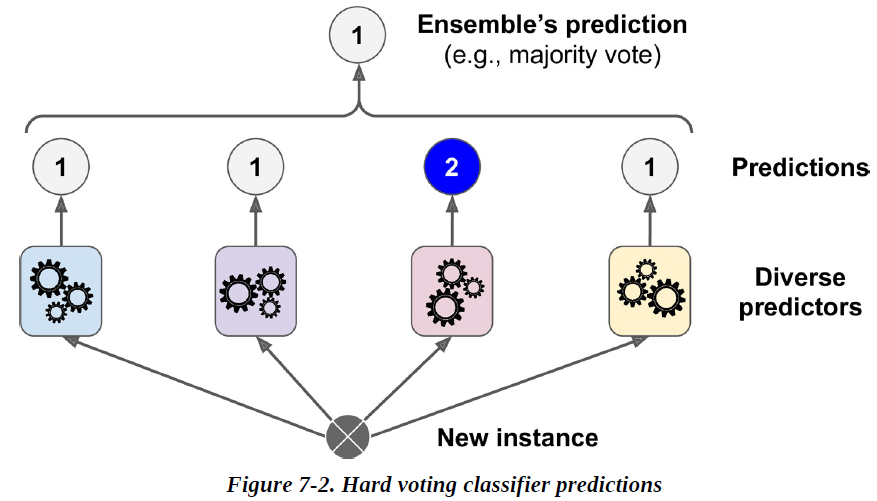

令人惊讶的是，该投票分类器通常比集合中的最佳分类器实现更高的准确性。实际上，即使每个分类器都是弱学习者（这意味着它仅比随机猜测略好），但只要有足够数量的弱学习者并且它们足够充分，它们的集成乘分类器仍可以是强学习者（实现高精度）

这怎么可能？下面的类比可以帮助阐明这个谜团。假设您的硬币略有偏差，正面有51％的机率，反面有49％的机率。如果将其抛掷1000次，通常将获得或多或少的510骰和490骰，或者多数正面朝上。如果您进行数学运算，您将发现经过1,000次抛掷后正面朝上的概率接近75％。投掷硬币的次数越多，则概率越高（例如，投掷10,000次，则概率会超过97％）。这是由于大量定律所致：随着您不断扔硬币，正面的比例越来越接近正面的概率（51％）。 下图显示了10个有偏差的抛硬序列。您可以看到，随着投掷次数的增加，正面朝上的比例接近51％。最终，所有10个序列的结果都非常接近51％，以至于它们始终高于50％。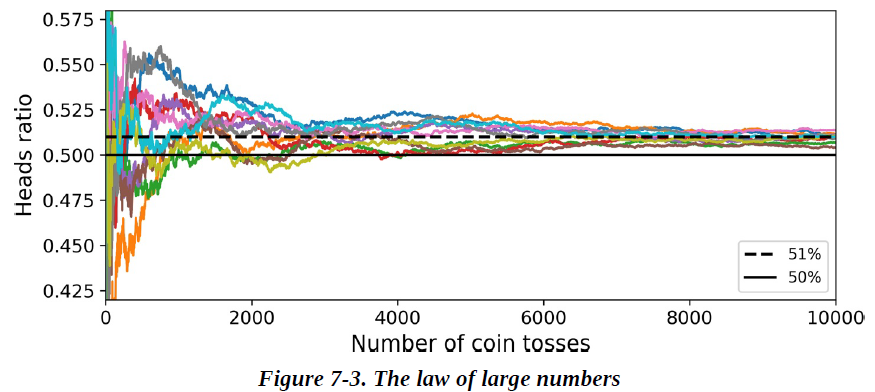

这是由于大量定律所致：随着您不断扔硬币，正面的比例越来越接近正面的概率（51％）。 图7-3显示了10个有偏差的抛硬币系列。 您可以看到，随着投掷次数的增加，正面朝上的比例接近51％。最终，所有10个序列的结果都非常接近51％，以至于它们始终高于50％。

同样，假设您建立了一个包含1,000个分类器的集合，这些分类器仅在51％的时间内被单独纠正（比随机猜测要好得多）。如果您预测多数投票的分类，则可以希望达到75％的准确性！仅当所有分类器完全独立且发生不相关的错误时才成立，这显然不是事实，因为它们是在相同数据上训练的。 他们可能会犯相同类型的错误，因此错误类别的选票将会很多，从而降低了集成的准确性。

**注意：**
当预测器彼此尽可能独立时，集成方法最有效。获得不同分类器的一种方法是使用完全不同的算法训练它们。这增加了他们犯非常不同类型的错误的机会，从而提高了整体的准确性。

以下代码在Scikit-Learn中创建和训练一个投票分类器，该分类器由三个不同的分类器组成（训练集是moons数据集）：

1. 加载数据集

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [2]:
X,y = make_moons(100, noise=0.2)

In [3]:
class1 = X[(y == 0)]

In [4]:
class2 = X[(y == 1)]

Text(0.5,1,'Moon dataset')

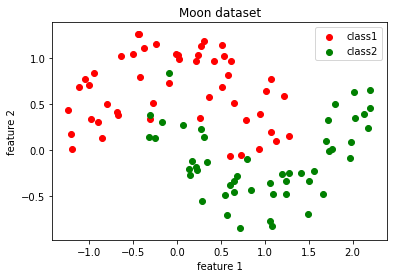

In [5]:
plt.scatter(class1[:,0], class1[:,1], color="red", label="class1")
plt.scatter(class2[:,0], class2[:,1], color="green", label="class2")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.title("Moon dataset")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

2. 构建集成三种分类器的模型

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [9]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [10]:
voting_clf = VotingClassifier(
             estimators = [("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
             voting="hard")

In [11]:
voting_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

3. 查看在测试集上的拟合效果

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.88
RandomForestClassifier 0.96
SVC 0.92
VotingClassifier 0.92


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma 

投票分类器略好于单个分类器。

如果所有分类器都能够估计分类概率（即它们都具有predict_proba()方法)，则可以告诉Scikit-Learn从所有分类器平均的分类概率选择最高的分类。它通常比硬投票获得更高的性能，因为它赋予了高度自信的投票更多的权重。您需要做的就是将voting =“ hard”替换为voting ="soft"，并确保所有分类器都可以估计类别概率。默认情况下，SVC类不是这种情况，因此您需要将其概率超参数设置为True（这将使SVC类使用交叉验证来估计类概率，从而减慢训练速度，并且会添加predict_proba（） 方法）。 如果您修改前面的代码以使用软投票，则会发现投票分类器的准确性可能会更高！

In [14]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

In [15]:
voting_clf = VotingClassifier(
             estimators = [("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
             voting="soft")

In [16]:
voting_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [17]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma 

LogisticRegression 0.88
RandomForestClassifier 1.0
SVC 0.92
VotingClassifier 1.0


**<font size=4>Bagging和Pasting</font>**

如前所述，获取多样化分类器的一种方法是使用非常不同的训练算法。 另一种方法是对每个预测变量使用相同的训练算法，并在训练集的不同随机子集上对其进行训练。当替换进行采样时，此方法称为装袋（bootstrap aggregation的缩写）。进行采样而不进行替换时，称为粘贴pasting。

换句话说，装袋和粘贴都允许跨多个预测变量对训练实例进行多次采样，但是只有bagging允许同一预测变量对训练实例进行多次采样。此采样和训练过程如下图所示：
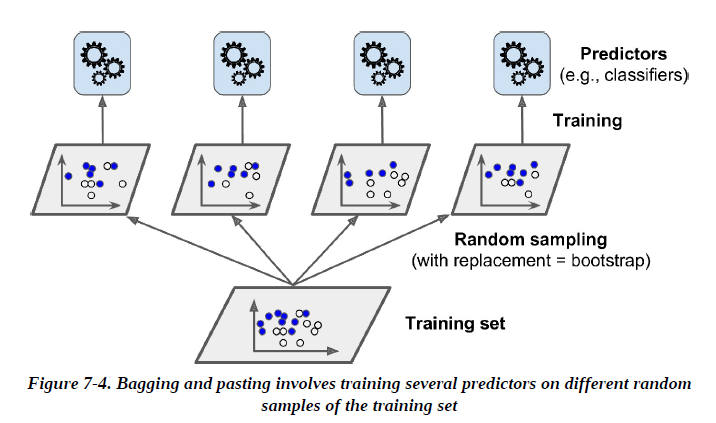

一旦所有预测变量都经过训练，集成就可以通过简单地汇总所有预测变量的预测来为新实例做出预测。聚集函数通常是用于分类的统计模式（即，最频繁的预测，就像硬投票分类器一样），或者是用于回归的平均值。与在原始训练集上进行训练相比，每个单独的预测变量都有更高的偏差，但是合计会减少偏差和方差。 通常，最终结果是与在原始训练集上训练的单个预测变量相比，该集合具有相似的偏差但方差更低。

如图所示，可以通过不同的CPU内核甚至不同的服务器并行地对预测变量进行训练。同样，可以并行进行预测。这就是套袋和粘贴之所以如此流行的原因之一：它们的伸缩性很好。

**<font size=4>sklearn中的Bagging和Pasting</font>**

Scikit-Learn使用BaggingClassifier类（或用于回归的BaggingRegressor）提供了用于bagging和pasting的简单API。下面的代码训练了500个决策树分类器的集合：每个分类器都在100个训练实例上进行训练，这些实例从训练集中随机采样（这是装袋的示例，但是如果要使用pasting，只需设置bootstrap = False）。 n_jobs参数告诉Scikit-Learn用于训练和预测的CPU内核数量（–1告诉Scikit-Learn使用所有可用的内核）：

可以将max_samples设置为0.0到1.0之间的浮点数，在这种情况下，要采样的最大实例数等于训练集大小乘以max_samples.

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
X_train.shape

(75, 2)

In [20]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=50, bootstrap=True, n_jobs=-1)

In [21]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [22]:
y_pred = bag_clf.predict(X_test)

In [23]:
bag_clf.score(X_test, y_test)

1.0

**<font color="red">提示:</font>**<br>
如果基本分类器可以估计类别概率（即如果它具有predict_proba（）方法），则BaggingClassifier自动执行软投票而不是硬投票（决策树分类器就是这种情况）

下图比较了单个决策树的决策边界与500棵装袋集合的决策边界（来自前面的代码），两者均在moon数据集上训练。如您所见，整体的预测可能比单个决策树的预测更好地推广：集成方法具有可比的偏差，但方差较小（它在训练集上产生的错误数量与单个决策树大致相同，但决策边界较为规律）。
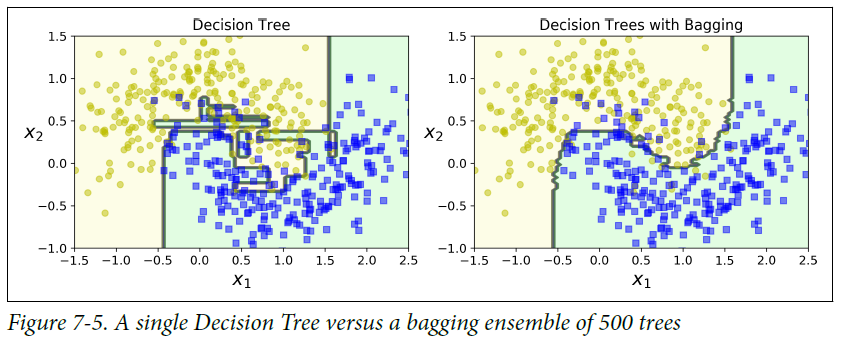

Bootstrap在每个预测变量的训练子集中引入了更多的多样性，因此bagging的最终的偏差要比pasting略高。但是额外的多样性也意味着预测变量之间的相关性降低，因此集成的方差减小了。总体而言，bagging通常会产生更好的模型，这解释了为什么通常首选它。但是，如果您有空闲时间和CPU能力，则可以使用交叉验证来评估bagging和pasting，然后选择效果最好的集成方式。

**<font size=4>out-of-bag估计</font>**

使用bagging，对于任何给定的预测变量，可能会对某些实例进行多次采样，而对其他实例则可能根本不采样。默认情况下，BaggingClassifier对m个训练实例进行替换采样（bootstrap = True），其中m是训练集的大小。这意味着每个预测变量平均仅采样约63％的训练实例。其余37％的未采样训练实例称为袋外（oob）实例。请注意，对于所有预测变量，它们都不完全为37％。

随着m的增长，该比率接近1 – exp（–1）≈63.212％。

由于预测器在训练期间从未看到oob实例，因此可以在这些实例上对其进行评估，而无需单独的验证集。您可以通过平均每个预测变量的oob评估来评估整体的集成方法。

在Scikit-Learn中，可以在创建BaggingClassifier时设置oob_score = True，以在训练后请求自动oob评估。以下代码演示了这一点。 可以通过oob_score_变量获得评估分数：

In [24]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, 
                           n_jobs=-1, oob_score=True)

In [25]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [26]:
bag_clf.oob_score_

0.92

根据此oob评估，此BaggingClassifier可能在测试集上达到约88％的准确性。让我们验证一下：

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred = bag_clf.predict(X_test)

In [29]:
bag_clf.score(X_test,y_test)

1.0

In [30]:
accuracy_score(y_test, y_pred)

1.0

每个训练实例的oob决策功能也可以通过oob_decision_function_变量获得。 在这种情况下（由于基本估计量具有predict_proba（）方法），决策函数返回每个训练实例的类概率。 例如，oob评估第一个训练实例具有98.4％的概率属于阴性类别（而1.6％的可能性属于阳性类别）：

In [31]:
bag_clf.oob_decision_function_

array([[0.99465241, 0.00534759],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.96491228, 0.03508772],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.29166667, 0.70833333],
       [0.92857143, 0.07142857],
       [0.975     , 0.025     ],
       [0.99484536, 0.00515464],
       [0.15736041, 0.84263959],
       [0.10752688, 0.89247312],
       [0.01612903, 0.98387097],
       [0.32967033, 0.67032967],
       [0.36458333, 0.63541667],
       [0.8875    , 0.1125    ],
       [1.        , 0.        ],
       [0.04568528, 0.95431472],
       [0.00595238, 0.99404762],
       [1.        , 0.        ],
       [0.92820513, 0.07179487],
       [0.        , 1.        ],
       [0.90721649, 0.09278351],
       [0.90710383, 0.09289617],
       [0.05113636, 0.94886364],
       [1.        , 0.        ],
       [0.02941176, 0.97058824],
       [0.99465241, 0.00534759],
       [0.99456522, 0.00543478],
       [0.

**<font size=4>随机patch和随机子空间</font>**

BaggingClassifier类也支持对特征进行采样。采样由两个超参数控制：max_features和bootstrap_features。它们的工作方式与max_samples和bootstrap相同，但是用于特征采样而不是实例采样。因此，将在输入特征的随机子集上训练每个预测变量。

当您处理高维输入（例如图像）时，此技术特别有用。对训练实例和特征进行采样称为随机补丁方法。保持所有训练实例（即bootstrap = False和max_sam ples = 1.0）但保留采样特征（即bootstrap_features = True和/或max_features小于1.0）称为随机子空间方法。

特征采样可给预测带来多样性，从而为降低方差而增加了一些偏差。

**<font size=5>二、随机森林</font>**

正如我们已经讨论过的，随机森林是决策树的集合，通常通过bagging方法（或有时通过pasting）进行训练，通常将max_samples设置为训练集的大小。您可以使用RandomForestClassifier类，而不是构建基于DecisionTreeClassifier的BaggingClassifier，而该类对于决策树更加方便且经过优化（类似，对于回归任务，还有RandomForestRegressor类）。以下代码使用所有可用的CPU核心来训练具有500棵树的随机森林分类器（每个树最多限制为16个节点）：

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [34]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [35]:
rnd_clf.score(X_test, y_test)

1.0

相比于用Bagging集成决策树的方式，精度提高了4%

除少数例外，RandomForestClassifier具有DecisionTreeClassifier的所有超参数（以控制树的生长方式），以及BaggingClassifier的所有超参数来控制集成本身。

**注意：**<br>
有几个显着的例外：不存在splitter（强制为“random”），不存在presort（强制为False），不存在max_samples（强制为1.0），以及不存在base_estimator（通过提供的超参数强制给DecisionTreeClassifier）。

树木生长时，随机森林算法会引入额外的随机性；它不是在分割节点时搜索最佳特征，而是在特征的随机子集中搜索最佳特征。该算法导致更大的树多样性，（再次）将更高的偏差换成更低的方差，通常会产生总体上更好的模型。以下BaggingClassifier大致等效于先前的RandomForestClassifier：

In [36]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

In [37]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=16,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='random'),
    

In [38]:
bag_clf.score(X_test, y_test)

0.96

**<font size=4>极限树Extra-trees</font>**

“随机森林”中的一棵树，在每个节点处仅考虑特征的随机子集进行分割（如前所述）。通过为每个特征使用随机阈值，而不是搜索最佳可能的阈值（如常规决策树一样），可以使树变得更加随机。

这种极限随机树的森林称为极限随机树集合（或简称为Extra-Trees）。这项技术将更大的偏差换成更低的方差。这也使Extra Trees的训练速度比常规的Random Forests要快得多，因为在每个节点上为每个特征找到最佳的阈值是生长树最耗时的任务之一。

您可以使用Scikit-Learn的ExtraTreesClassifier类。它的API与RandomForestClassifier类相同。 同样，ExtraTreesRegressor类具有与RandomForestRegressor类相同的API。

很难事先判断出RandomForestClassifier的性能会好于ExtraTreesClassifier。 通常，唯一知道的方法是尝试两者并使用交叉验证比较它们（使用网格搜索调整超参数）

**<font size=4>特征重要性</font>**

随机森林的另一个出色品质是，它们使测量每个特征的相对重要性变得容易。Scikit-Learn通过查看使用该特征的树节点平均（在森林中的所有树木上）减少杂质的程度来衡量该特征的重要性。更准确地说，它是一个加权平均值，其中每个节点的权重等于与之相关的训练样本数量（请参阅第6章）。

Scikit-Learn在训练后会自动为每个特征计算该分数，然后对结果进行缩放，以使所有特征重要性的总和等于1。您可以使用feature_importances_变量访问结果。例如，以下代码在iris数据集上训练了RandomForestClassifier，并输出每个特征的重要性。似乎最重要的特征是花瓣的长度（44％）和宽度（42％），而萼片的长度和宽度相比而言并不重要（分别为11％和2％）：

In [39]:
from sklearn.datasets import load_iris

In [40]:
iris = load_iris()

In [41]:
data, label = iris.data, iris.target

In [42]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [43]:
rnd_clf.fit(data, label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [44]:
for name, score in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0980392668270613
sepal width (cm) 0.023533601341059265
petal length (cm) 0.4218076205190178
petal width (cm) 0.4566195113128617


同样，如果在MNIST数据集上训练随机森林分类器（在第3章中介绍），并绘制每个像素的重要性，则会得到如图示的图像。
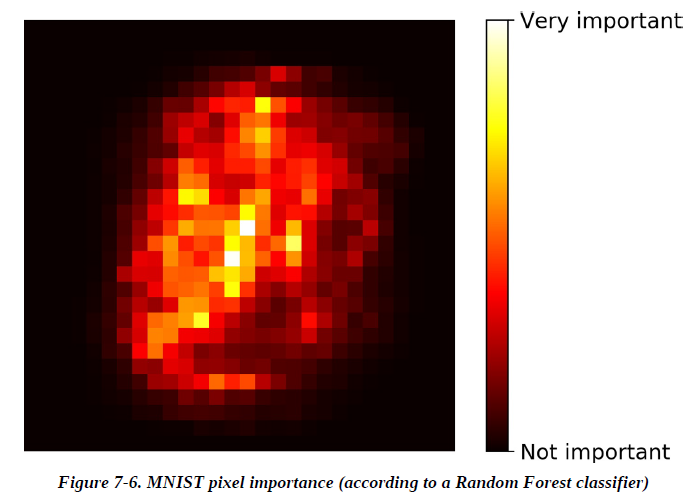

随机森林非常方便您快速了解哪些特征真正重要，尤其是在需要执行特征选择时

**<font size=5>三、Boosting</font>**

Boosting（最初称为假设增强）是指可以将多个弱学习器组合为强学习器的任何Ensemble方法。大多数提升方法的总体思路是按顺序训练预测器，每种方法都试图纠正其前身。有很多可用的增强方法，但是到目前为止最受欢迎的是AdaBoost（自适应增强的缩写）和渐变增强。让我们从AdaBoost开始。

**<font size=4>Adaboost</font>**

新的预测器纠正其前一个estimator的一种方法是，更多地注意前一个estimator未拟合的训练实例。 这导致新的预测器越来越多地集中在困难例子上。

例如，在训练AdaBoost分类器时，该算法首先训练一个基础分类器（例如决策树），并使用它对训练集进行预测。然后，该算法会增加分类错误的训练实例的相对权重。然后，它使用更新后的权重训练第二个分类器，并再次对训练集进行预测，更新实例权重，依此类推。
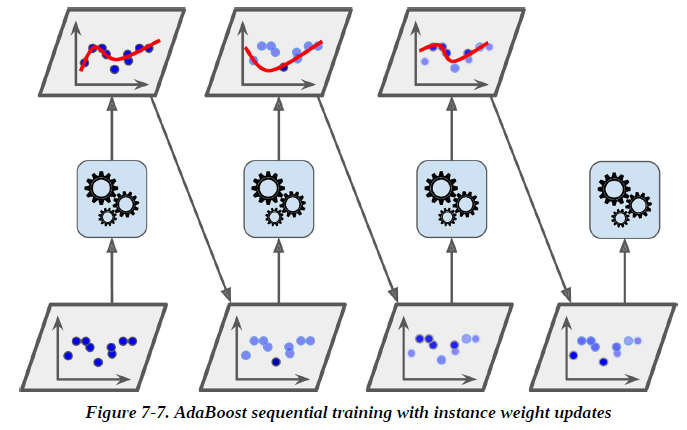

下图显示了moon数据集上五个连续的预测变量的决策边界（在此示例中，每个预测变量都是具有RBF内核的高度正则化SVM分类器）。第一个分类器将许多实例弄错了，因此权重得到了提高。因此，第二个分类器在这些实例上做得更好，依此类推。
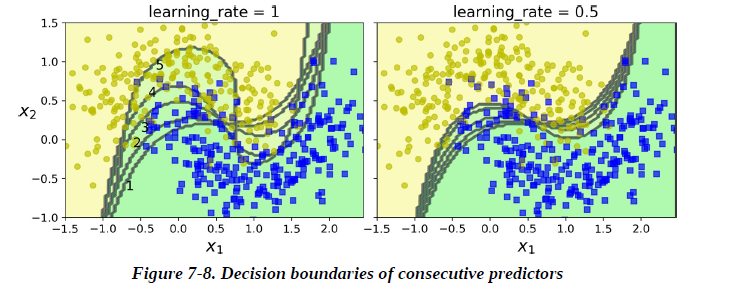

右边的图表示相同的预测变量序列，除了学习率减半（即，错误分类的实例权重在每次迭代时提高一半）。 如您所见，这种顺序学习技术与Gradient Descent有一些相似之处，除了AdaBoost不会调整单个预测变量的参数以最小化代价函数之外，它还在集成中添加了预测变量，从而使其逐渐变得更好。

一旦所有预测变量都经过训练，集成就可以像bagging或pasting一样进行预测，只是预测变量根据加权训练集的整体准确性而具有不同的权重。

**<font color="red">提示：</font>**<br>
这种顺序学习技术的一个重要缺点是：它不能并行化（或仅部分地并行化），因为每个预测变量只能在对先前的预测变量进行训练和评估之后才能进行训练。结果，它不能像bagging或pasting一样缩放。

让我们仔细看看AdaBoost算法。每个实例权重w最初设置为1/m。对第一预测变量进行训练，并在训练集合上计算其加权错误率r1。
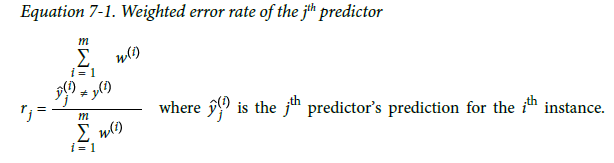

然后，使用下列公式计算预测变量的权重αj，其中η是学习率超参数（默认为1）。预测变量越准确，其权重就越高。 如果只是随机猜测，则其权重将接近零。但是，如果最常见的错误是错误（即不如随机猜测那么准确），则其权重将为负。

接下来，AdaBoost算法使用公式更新实例权重，从而提高了误分类实例的权重:
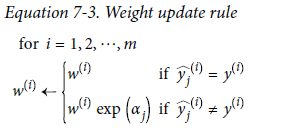

然后将所有实例权重标准化
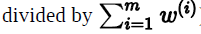

最后，使用更新后的权重训练新的预测变量，并重复整个过程（计算新的预测变量的权重，更新实例权重，然后训练另一个预测变量，依此类推）。 当达到所需的预测变量数或找到理想的预测变量时，算法将停止。为了进行预测，AdaBoost只需计算所有预测变量的预测并使用预测变量权重αj对其加权。预测的类别是获得多数加权投票的类别（请参见公式）。
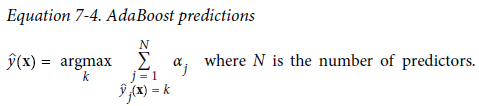

Scikit-Learn使用称为SAMME的AdaBoost的多类版本（代表使用多类指数损失函数的分阶段加性建模）。当只有两个类时，SAMME等同于AdaBoost。Scikit-Learn可以使用SAMME的一个变体SAMME.R（R代表真实Real，如果预测变量可以估计类概率（即，如果它们具有predict_proba（）方法），它依赖于类别概率而不是预测，并且通常表现更好。

以下代码使用Scikit-Learn的AdaBoostClassifier类（如您所料，还有一个AdaBoostRegressor类），基于200个决策树训练AdaBoost分类器。决策树是具有max_depth = 1的决策树，换句话说，是由单个决策节点和两个叶节点组成的树。这是AdaBoostClassifier类的默认基本估计器：

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada_clf = AdaBoostClassifier(
                             DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", learning_rate=0.5
                             )

In [47]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [48]:
ada_clf.score(X_train, y_train)

1.0

In [49]:
ada_clf.score(X_test, y_test)

0.88

如果您的AdaBoost对训练集过拟合，则可以尝试减少n_estimators，或者更强地对基本估计量进行正则化

**<font size=4>梯度提升Gradient Boosting</font>**

另一个非常流行的增强算法是梯度提升。就像AdaBoost一样，“梯度提升”的工作原理是将预测变量顺序地添加到一个集成器中，每个预测变量都会更正之前的预测器。但是，此方法没有像AdaBoost那样在每次迭代时都调整实例权重，而是尝试使新的预测变量拟合先前的预测变量造成的残差。

让我们来看一个简单的回归示例，以决策树作为基础预测变量（当然，梯度增提升也可以很好地用于回归任务）。这称为梯度提升树或梯度提升回归树（GBRT）。首先，让DecisionTreeRegressor拟合训练集（例如，嘈杂的二次训练集）：

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)

In [52]:
tree_reg1.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

接下来，我们将训练第二个DecisionTreeRegressor，以拟合第一个预测变量产生的残差：

In [53]:
y2 = y - tree_reg1.predict(X)

In [54]:
tree_reg2 = DecisionTreeRegressor(max_depth=2) 

In [55]:
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

然后，我们训练第二个预测变量产生的残差的第三个回归变量：

In [56]:
y3 = y2 - tree_reg2.predict(X)

In [57]:
tree_reg3 = DecisionTreeRegressor(max_depth=2) 

In [58]:
tree_reg3.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

现在我们有一个包含三棵树的集成模型。它可以简单地通过将所有树的预测相加来对新实例进行预测

下图左列代表了这三棵树的预测，在右列中代表了整体的预测。在第一行中，集成模型只有一棵树，因此其预测与第一棵树的预测完全相同。在第二行中，根据第一棵树的残留错误训练新树。在右侧，您可以看到集合的预测等于前两棵树的预测总和。类似地，在第三行中，根据第二棵树的残留错误训练另一棵树。您会看到，随着树木的加入，整体的预测逐渐变得更好。
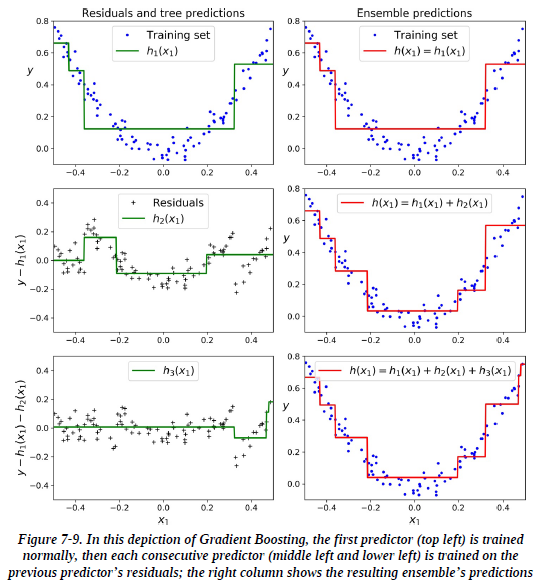

训练GBRT集成的一种更简单的方法是使用Scikit-Learn的GradientBoostingRegressor类。与RandomForestRegressor类非常相似，它具有控制决策树增长的超参数（例如max_depth min_samples_leaf）以及控制集成训练的超参数，例如树的数量（n_estimators）。 以下代码创建与上一个相同的集合：

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

In [61]:
gbrt.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

earning_rate超参数可缩放每棵树的贡献。 如果将其设置为较低的值（例如0.1），则集成中将需要更多树以拟合训练集，但通常可以更好地进行预测。这是一种称为shrinkage的正则化技术。下图显示了两个以较低学习率训练的GBRT集成体：左侧的一个树没有足够的树来拟合训练集，而右侧的一个树则有太多的树过拟合了训练集。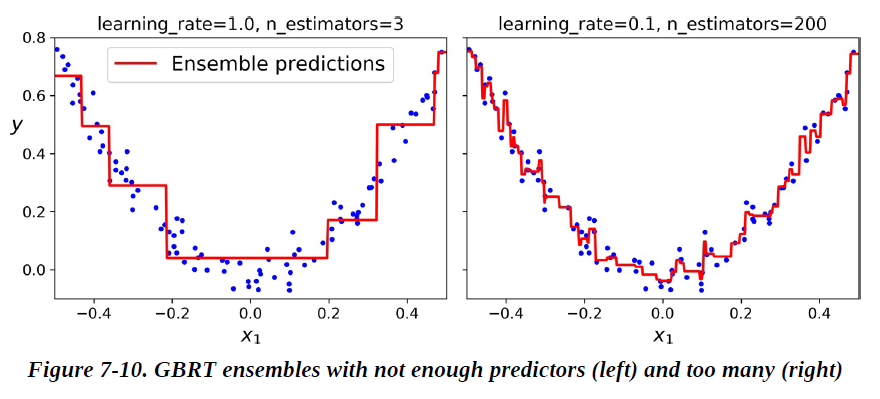

为了找到最佳的树木数量，可以使用提前停止（请参阅第4章）。一种简单的实现方法是使用staged_predict（）方法：它在训练的每个阶段（带有一棵树，两棵树等）上返回由集合做出的预测的迭代器。以下代码训练了一个包含120棵树的GBRT集合，然后在训练的每个阶段测量验证误差以找到最佳树数，最后使用该最佳树数训练另一个GBRT集合：

In [62]:
import numpy as np

In [63]:
X = np.linspace(-1,1,100)

In [64]:
y = X**2 + np.random.rand(100)*0.2

In [65]:
X.shape

(100,)

In [66]:
y.shape

(100,)

In [67]:
import matplotlib.pyplot as plt

Text(0.5,1,'Quadratic Polynomial')

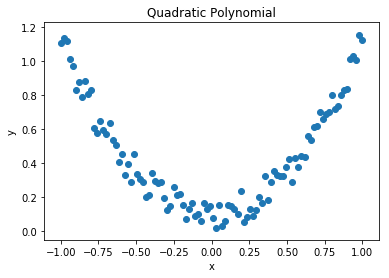

In [68]:
plt.scatter(X,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Polynomial")

In [69]:
import numpy as np

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [74]:
X_train.shape

(75, 1)

In [75]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120,learning_rate=0.1)
gbrt.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
gbrt.score(X_test,y_test)

0.9286330129190831

In [77]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbrt.staged_predict(X_test)]

In [78]:
best = np.argmin(errors)

In [79]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best, learning_rate=0.1)

In [80]:
gbrt_best.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=43,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
gbrt_best.score(X_test, y_test)

0.9366104958651256

测试错误率显示在下图的左侧，最佳模型的预测显示在右侧。
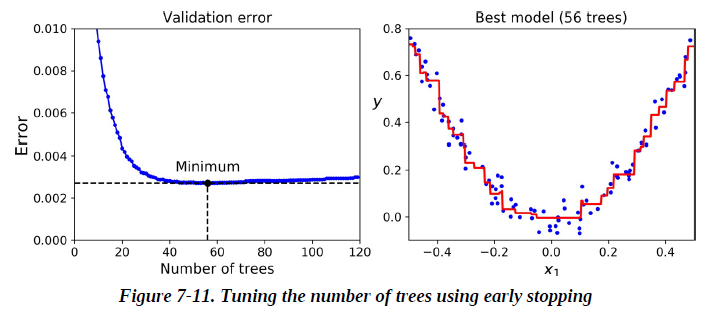

In [82]:
y_pred = gbrt_best.predict(X)

Text(0.5,1,'Quadratic Polynomial')

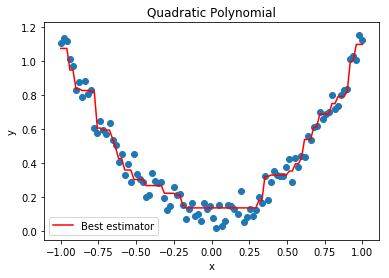

In [83]:
plt.scatter(X,y)
plt.plot(X,y_pred,color="red", label="Best estimator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Quadratic Polynomial")

也可以通过实际上提前停止训练（而不是先训练大量树然后回头寻找最佳数量）来实现提前停止。您可以通过设置warm_start = True来做到这一点，这使Scikit-Learn在调用fit（）方法时保留现有树，从而允许进行增量训练。当验证错误连续五个迭代没有改善时，以下代码将停止训练：
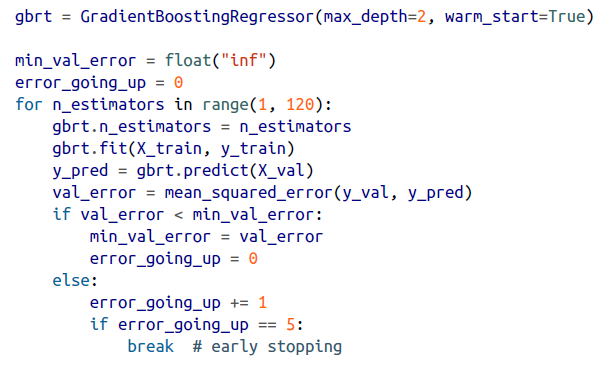

GradientBoostingRegressor类还支持subsample超参数，该参数指定了用于训练每棵树的实例的比例。例如，如果subsample= 0.25，则在随机选择的25％的实例用于训练每棵树。您可能现在已经猜到了，该技术将较高的偏差换成较小的方差。它还可以大大加快训练速度。这称为随机梯度提升。

**<font color="red">可以将“梯度提升”与其他代价函数一起使用，这由loss超参数控制</font>**

**<font size=4>XGBoost</font>**

值得注意的是，流行的Python库XGBoost中提供了Gradient Boosting的优化实现，该库代表Extreme Gradient Boosting。该程序包最初由Chen Tianqi Chen作为分布式（深度）机器学习社区（DMLC）的一部分而开发，其目标是快速、可扩展和可移植。实际上，XGBoost通常是机器学习竞赛中获胜作品的重要组成部分。XGBoost的API与Scikit-Learn的API非常相似：

In [84]:
import xgboost

In [85]:
xgb_reg = xgboost.XGBRegressor()

In [86]:
y_train.shape

(75, 1)

In [87]:
X_train.shape

(75, 1)

In [88]:
xgb_reg.fit(X_train, y_train)

[09:14:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [89]:
xgb_reg.score(X_test,y_test)

0.9496171698252175

XGBoost还提供了一些不错的功能，例如自动处理提早停止：您一定要检查一下！

fit()参数详解:<br>
**eval_metric="mlogloss"**:评估标准(多分类问题，使用mlogloss作为损失函数)<br>
**eval_set=[(X_test,y_test)]**:评估数据集,list类型<br>
**early_stopping_rounds= 2**: 如果模型的loss两次内没有减小，则提前结束模型训练<br>
**verbose = True**: True显示，False不显示

In [90]:
xgb_reg.fit( X_train, y_train, eval_set=[(X_test,y_test)],early_stopping_rounds=2)

[09:14:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.294736
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.271135
[2]	validation_0-rmse:0.248871
[3]	validation_0-rmse:0.229101
[4]	validation_0-rmse:0.211604
[5]	validation_0-rmse:0.195483
[6]	validation_0-rmse:0.181933
[7]	validation_0-rmse:0.169505
[8]	validation_0-rmse:0.157004
[9]	validation_0-rmse:0.146515
[10]	validation_0-rmse:0.13639
[11]	validation_0-rmse:0.127932
[12]	validation_0-rmse:0.120045
[13]	validation_0-rmse:0.113327
[14]	validation_0-rmse:0.106882
[15]	validation_0-rmse:0.101045
[16]	validation_0-rmse:0.096249
[17]	validation_0-rmse:0.091958
[18]	validation_0-rmse:0.088205
[19]	validation_0-rmse:0.084553
[20]	validation_0-rmse:0.081695
[21]	validation_0-rmse:0.078906
[22]	validation_0-rmse:0.076954
[23]	validation_0-rmse:0.074705
[24]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**<font size=4>Stacking层次融合</font>**

我们将在本章中讨论的最后一个Ensemble方法称为Stacking（堆栈通用化的缩写）。它基于一个简单的想法：与其使用琐碎的功能（例如硬投票）来汇总集合中所有预测变量的预测，我们为什么不训练一个模型来执行这种聚合？下图显示了这样一个集合，它对新实例执行回归任务。底部的三个预测变量中的每个预测变量都将预测一个不同的值（3.1、2.7和2.9），然后最终的预测变量（称为Blender或元学习器）将这些预测作为输入并进行最终预测（3.0）。
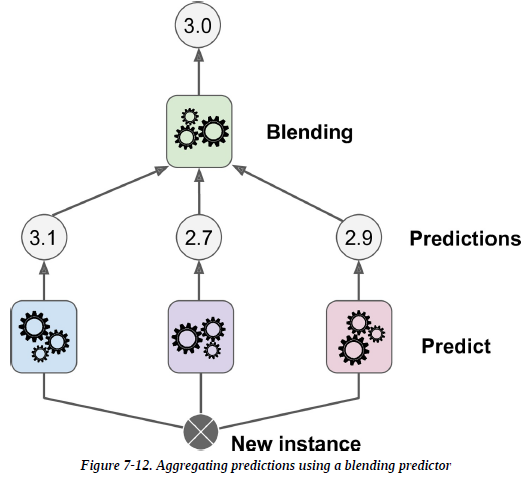

要训练blender，一种常见的方法是使用hold-out set。可替代地，可以使用out-of-fold预测。 在某些情况下，这称为堆栈，而使用保留集称为blending。 但是，对于许多人来说，这些术语是同义词。让我们看看它是如何工作的。首先，将训练集分为两个子集。第一个子集用于训练第一层中的预测变量（请参见下图）。
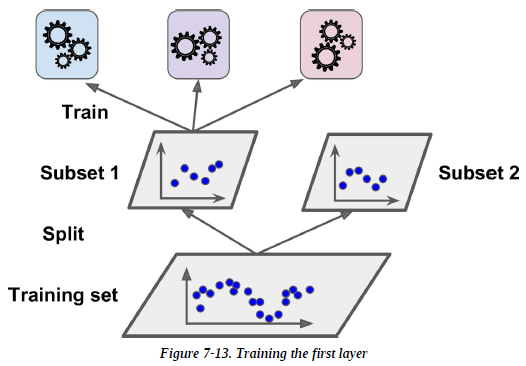

接下来，使用第一层的预测变量对第二个（保留的）集合进行预测（下图所示）。 这确保了预测是“干净的”，因为预测者在训练期间从未见过这些实例。对于保留集中的每个实例，有三个预测值。我们可以使用这些预测值作为输入特征来创建新的训练集（这使该新训练集成为3D），并保留目标值。blender在此新的训练集上进行了训练，因此，它根据第一层的预测学习了预测目标值。
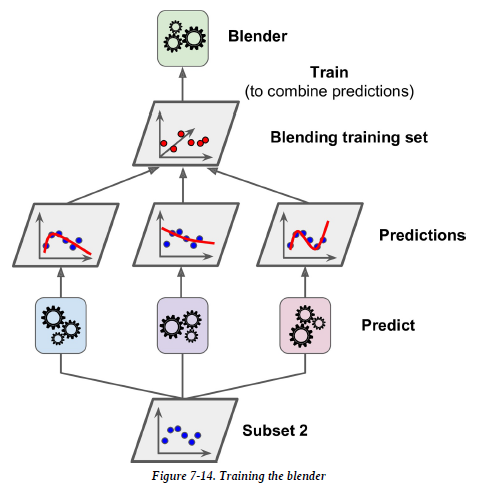

实际上可以以这种方式训练几个不同的blender（例如，一个使用线性回归，另一个使用随机森林回归），以获得整个blender层。技巧是将训练集分为三个子集：第一个用于训练第一层，第二个用于创建训练用于第二层的训练集（使用第一层的预测变量进行的预测）），第三个用于创建训练集以训练第三层（使用第二层的预测变量进行的预测）。完成此操作后，我们可以通过依次遍历每一层来预测新实例，如下图所示。
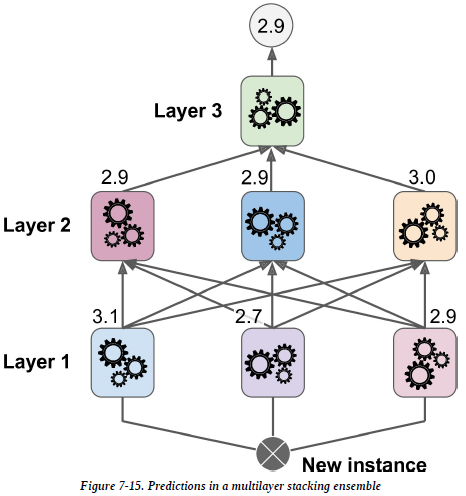

不幸的是，Scikit-Learn不直接支持堆栈，但是推出自己的实现并不难。或者，可以使用开源实现，例如brew